# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     777.8
Date:                Sun, 11 Jun 2023   Prob (F-statistic):           2.10e-39
Time:                        00:53:24   Log-Likelihood:                -3.6366
No. Observations:                  50   AIC:                             15.27
Df Residuals:                      46   BIC:                             22.92
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9654      0.092     53.696      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.4810954   4.95541251  5.39110146  5.76127431  6.04874684  6.24886187
  6.37025439  6.43343292  6.46740996  6.50493534  6.57711553  6.70830289
  6.9120947   7.18909914  7.52683536  7.90178406  8.28325165  8.6384131
  8.93770502  9.15968282  9.29454403  9.34573878  9.32940297  9.2717072
  9.20455698  9.16035078  9.16665704  9.24168476  9.39129178  9.60802241
  9.87233232 10.15579967 10.4257947  10.65084072 10.80578565 10.87593442
 10.85946335 10.76771974 10.62335759 10.45661555 10.30034886 10.18463127
 10.13181407 10.15285378 10.24551202 10.39472335 10.57507038 10.75495984
 10.90181324 10.98741943]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.98165608 10.84579757 10.59919182 10.28593023  9.96405261  9.69133699
  9.51115356  9.44184612  9.47224089  9.56438223]


## Plot comparison

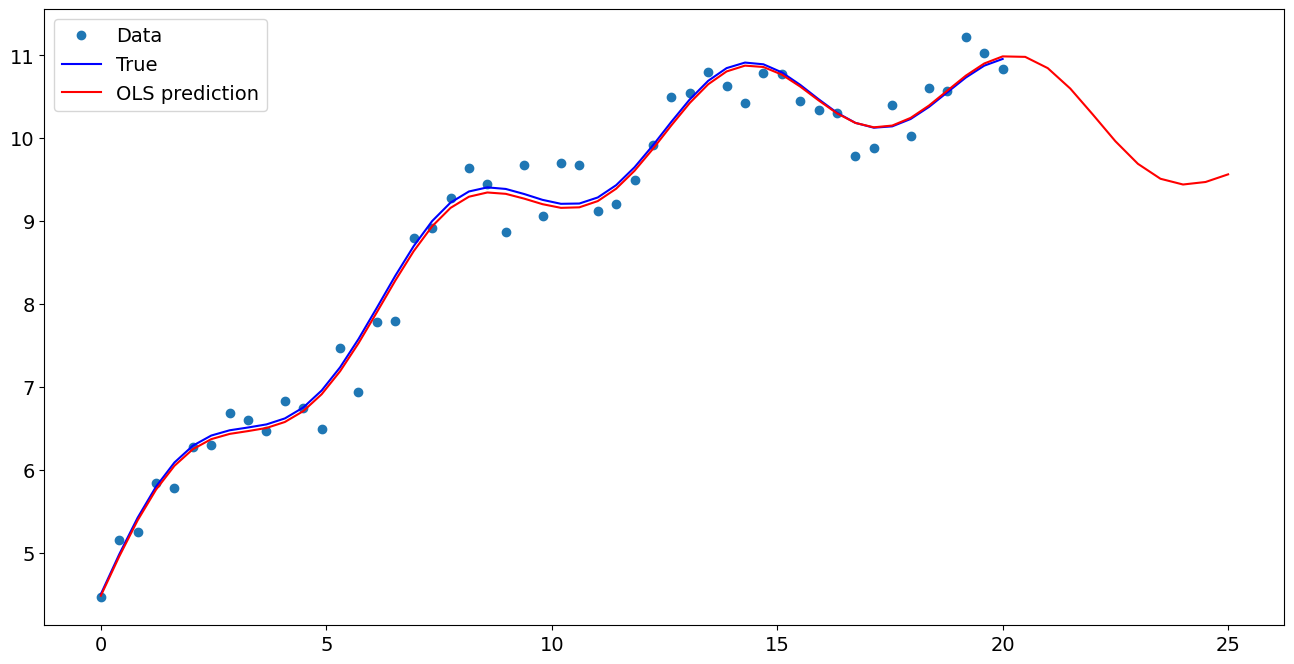

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.965356
x1                  0.496500
np.sin(x1)          0.493365
I((x1 - 5) ** 2)   -0.019370
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.981656
1    10.845798
2    10.599192
3    10.285930
4     9.964053
5     9.691337
6     9.511154
7     9.441846
8     9.472241
9     9.564382
dtype: float64